## Homework - Machine Learning Preparation
### Agi Rahmawandi <br> Batch 57



In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  2.2.5
pandas version :  2.2.3
seaborn version :  0.13.2


In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")


**Product Classification**<br>
**Deskripsi**<br>
* Memprediksi apakah suatu produk eksklusif atau tidak berdasarkan fitur yang tersedia<br>


### Load data

In [3]:
df = pd.read_csv('./dataset/Product_Exclusive_Classification.csv')

## 1. Descriptive Statistics (5 poin)
Gunakan function info dan describe pada dataset final project kalian. Tuliskan hasil
observasinya, seperti:<br>
A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya
kurang sesuai?<br>
B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?<br>
C. Apakah ada kolom yang memiliki nilai summary agak aneh?<br>
(min/mean/median/max/unique/top/freq)<br>
* Untuk masing-masing jenis observasi, tuliskan juga

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8000 non-null   int64  
 1   brand              8000 non-null   object 
 2   category           7987 non-null   object 
 3   rating             7905 non-null   float64
 4   number_of_reviews  7991 non-null   float64
 5   love               7966 non-null   float64
 6   price              7992 non-null   float64
 7   value_price        7983 non-null   float64
 8   exclusive          8000 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 562.6+ KB


In [5]:
## pengelompokan berdasar jenis kolom
obj = ['brand','category']
numbs = ['rating','number_of_reviews','love','price','value_price']

In [6]:
df[obj].describe()

,brand,category
count,8000,7987
unique,310,142
top,SEPHORA COLLECTION,Perfume
freq,492,619


In [7]:
df[numbs].describe()

,rating,number_of_reviews,love,price,value_price
count,7905.000000,7991.000000,7.966000e+03,7992.000000,7983.000000
mean,4.085136,303.574396,1.756396e+04,49.900935,50.983300
std,0.761069,931.724460,4.425339e+04,46.864764,48.473049
min,0.000000,0.000000,0.000000e+00,2.000000,2.000000
25%,4.000000,14.000000,2.000000e+03,24.000000,24.000000
50%,4.000000,56.000000,5.500000e+03,35.000000,35.000000
75%,4.500000,231.500000,1.530000e+04,59.000000,60.000000
max,5.000000,19000.000000,1.300000e+06,549.000000,549.000000


In [8]:
for col in obj:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom brand:
brand
SEPHORA COLLECTION    492
CLINIQUE              211
TOM FORD              150
tarte                 143
Kiehl's Since 1851    122
                     ... 
Flora + Bast            1
Lunar Beauty            1
DL.MD                   1
Jillian Dempsey         1
Saint Jane Beauty       1
Name: count, Length: 310, dtype: int64

Value count kolom category:
category
Perfume                      619
Moisturizers                 395
Face Serums                  334
Value & Gift Sets            241
Face Wash & Cleansers        225
                            ... 
Powder Brush                   1
Hair Thinning & Hair Loss      1
Lip Treatments                 1
Curls & Coils                  1
Cleansing Brushes              1
Name: count, Length: 142, dtype: int64



In [9]:
df.isna().sum()

id                    0
brand                 0
category             13
rating               95
number_of_reviews     9
love                 34
price                 8
value_price          17
exclusive             0
dtype: int64

In [10]:
df.sample(5)

,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive
3467,1972561,Marc Jacobs Beauty,Lipstick,4.5,2000.0,20600.0,26.0,26.0,1
5141,2117745,Lab Series For Men,Moisturizers,5.0,1.0,300.0,35.0,35.0,0
2298,1819960,Herbivore,Face Wash & Cleansers,4.5,276.0,24400.0,12.0,12.0,0
1078,1558857,Versace,Cologne,4.5,322.0,19500.0,118.0,172.0,0
2685,1873470,ELLIS BROOKLYN,Lotions & Oils,5.0,3.0,738.0,55.0,55.0,0


A. Type data dan nama kolom rata-rata sudah sesuai, hanya saja akan lebih baik untuk id di ubah ke obj<br>
B. kolom yang memiliki nilai kosong adalah category,rating, number_of_reviews,love,price,value_price<br>
C. dikolom number_of_reviews nilai mean dan median terlihat cukup jauh perbedaan nya **mean 303.57**, **median 56** serta **standar deviasinya** juga rentangnya cukup jauh dari mean yakni **931.7**

https://www.kaggle.com/code/mohammadfikri/product-exclusive-classification-roc-auc-87/notebook

# Exploratory Data Analysis (EDA)

## Pendekatan Numerik (10 Poin)

## Pendekatan Grafis

## 2. Univariate Analysis
Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun
target). <br>Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya
menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya
terlalu banyak, dsb).<br> Jelaskan juga apa yang harus di-follow up saat data pre-processing.

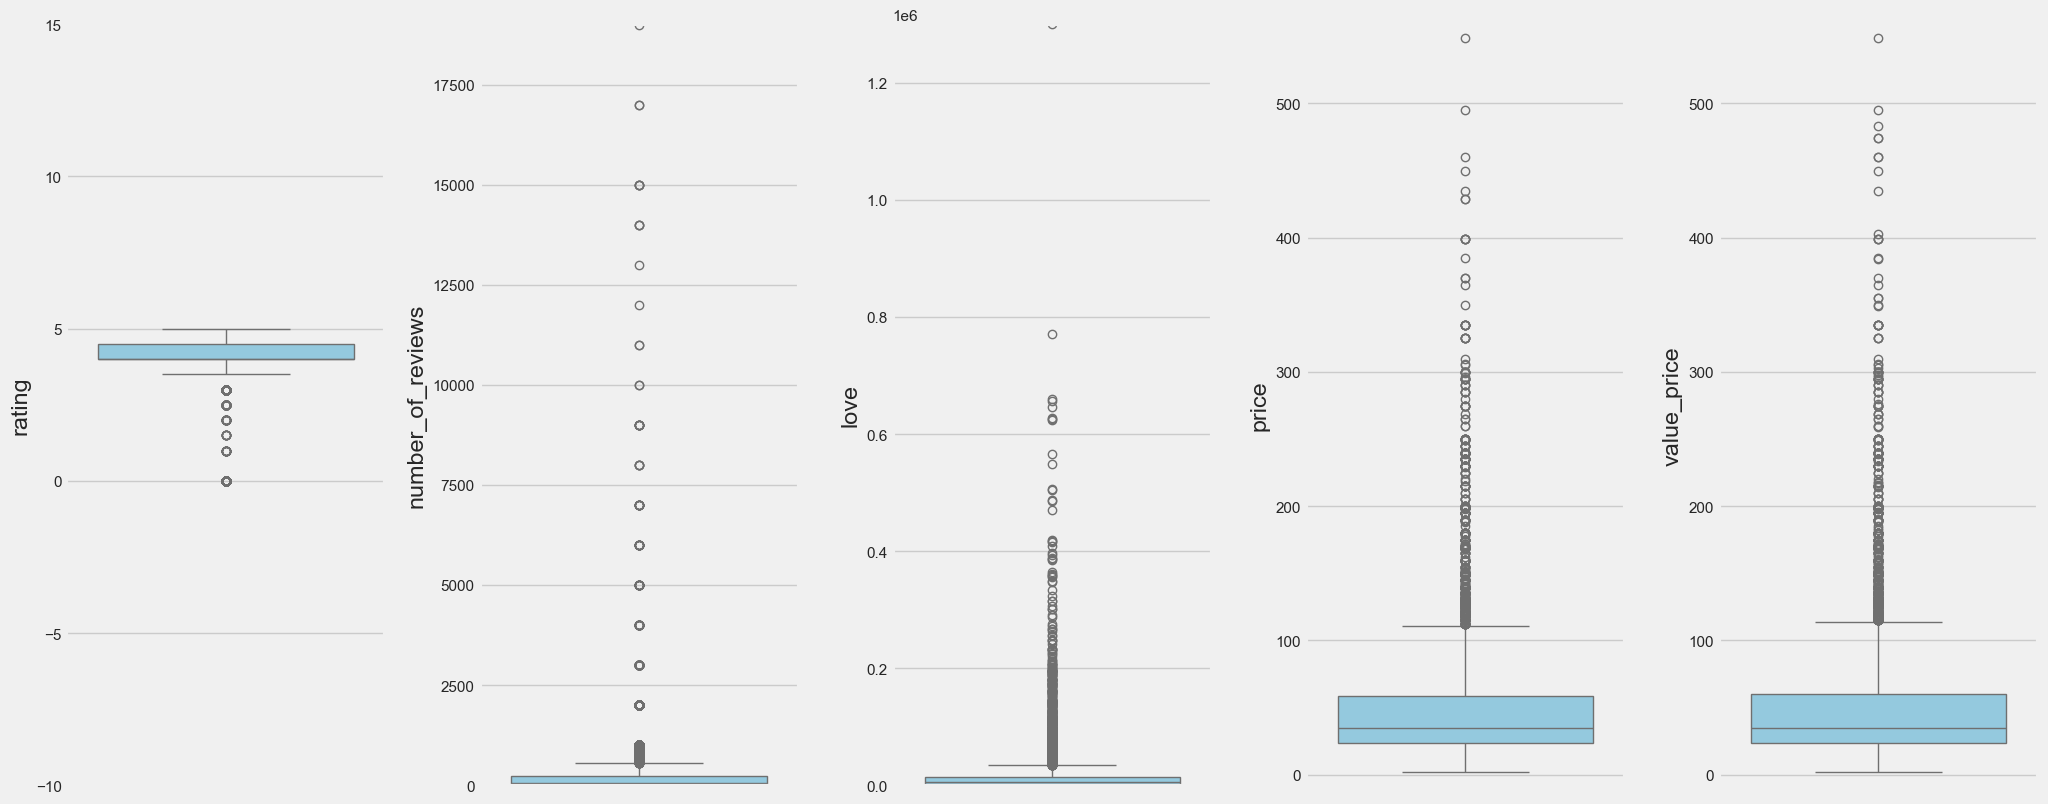

In [11]:
for i in range(len(numbs)):
    plt.subplot(1, len(numbs), i + 1)
    sns.boxplot(y=df[numbs[i]], color='skyblue')
    col_min = df[numbs[i]].min()
    col_max = df[numbs[i]].max()
    plt.ylim(col_min - 10, col_max + 10)

plt.tight_layout()
plt.show()

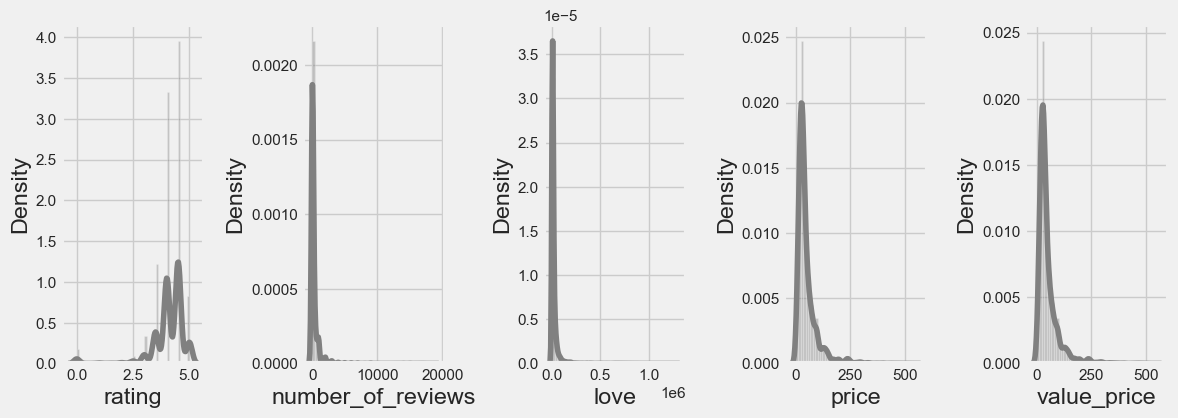

In [12]:
plt.figure(figsize=(12, 8))
for i in range(0, len(numbs)):
    plt.subplot(2, len(numbs), i+1)
    sns.distplot(df[numbs[i]], color='gray')
    

plt.tight_layout()
plt.show()

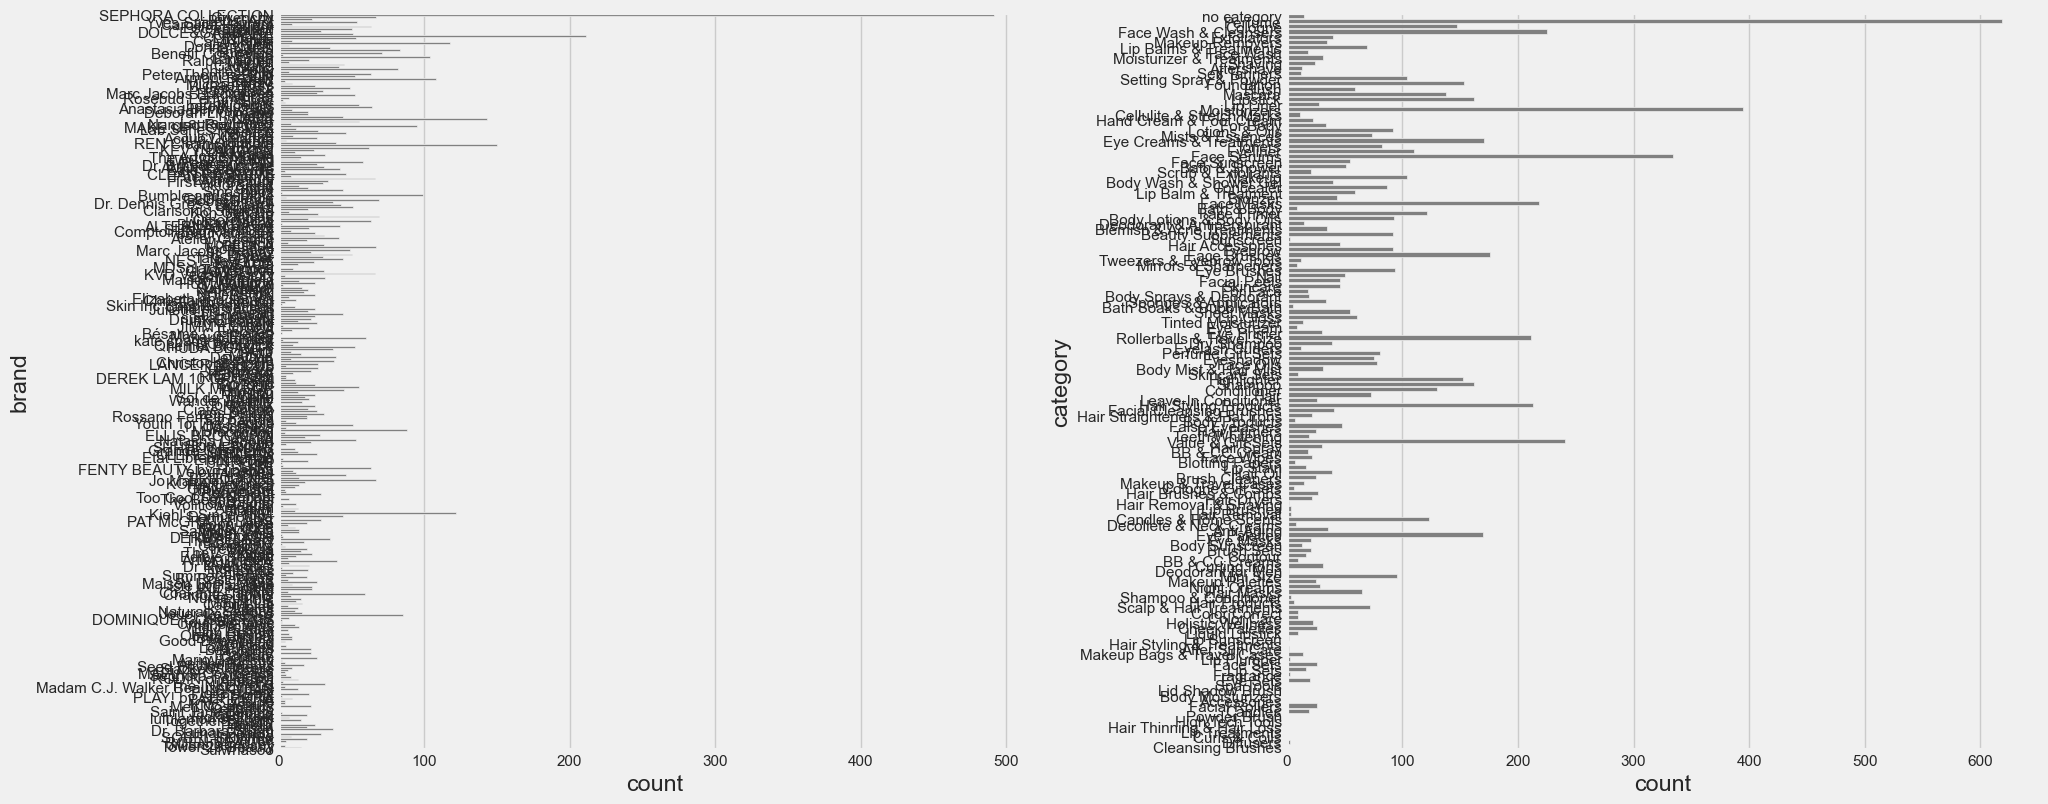

In [13]:
for i in range(len(obj)):
    plt.subplot(1, len(obj), i + 1)  # gunakan 1 baris karena hanya 2 kolom
    sns.countplot(y=df[obj[i]], color='gray')  # orient='h' → pakai y untuk horizontal
plt.tight_layout()
plt.show()


## 3. Multivariate Analysis (15 poin)
Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang
diajarkan di kelas). Tuliskan hasil observasinya, seperti: <br>
A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana
saja yang paling relevan dan harus dipertahankan?<br>
B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu
dilakukan terhadap feature itu?<br>
* Tuliskan juga jika memang tidak ada feature yang saling berkorelasi

<Axes: >

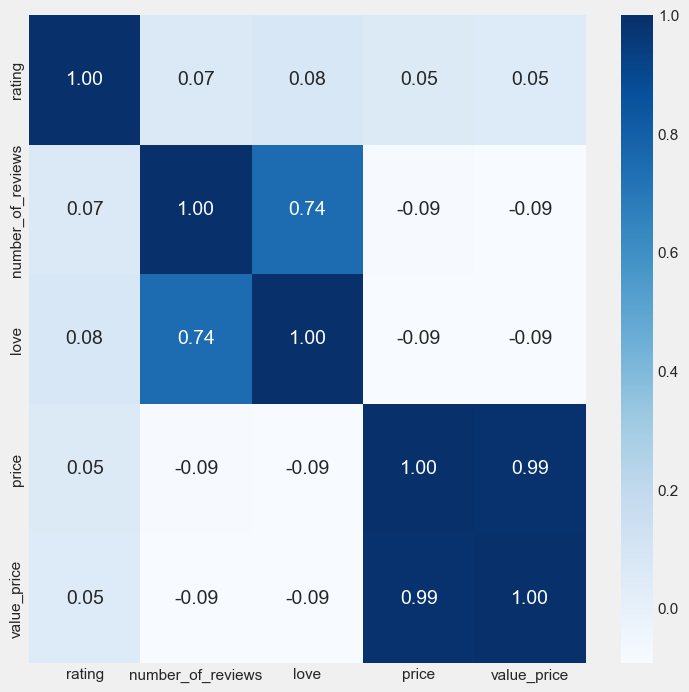

In [15]:
plt.figure(figsize=(8, 8))
sns.heatmap(df[numbs].corr(), cmap='Blues', annot=True, fmt='.2f')

## Insight (20 Poin)

Apa saja insight yang kamu temukan dari hasil-hasil analisis di atas?

## 4. Data Cleansing (40 poin)
Lakukan pembersihan data, sesuai yang diajarkan di kelas, seperti:<br>
A. Handle missing values<br>
B. Handle duplicate data<br>
C. Handle outliers<br>
D. Feature transformation<br>
E. Feature encoding<br>
F. Handle class imbalance<br>
Di laporan homework, tuliskan apa saja yang telah dilakukan dan metode yang digunakan.<br>
* Tetap tuliskan jika memang ada tidak yang perlu di-handle (contoh: “Tidak perlu feature
encoding karena semua feature sudah numerical” atau “Outlier tidak di-handle karena akan
fokus menggunakan model yang robust terhadap outlier”).

### A. Missing Value 

In [21]:
df.sample(5)

,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive
6769,2223295,HUDA BEAUTY,Eye Brushes,4.5,20.0,6600.0,15.0,15.0,1
6607,2213692,dpHUE,Value & Gift Sets,4.5,31.0,9600.0,50.0,73.0,0
5736,2170108,Marc Jacobs Beauty,Eye Palettes,4.5,100.0,11300.0,49.5,49.5,0
3846,2012300,TAN-LUXE,For Face,4.0,45.0,8200.0,33.0,33.0,0
5254,2126290,ghd,Curling Irons,4.0,47.0,4900.0,199.0,199.0,0


In [26]:
df.isna().sum()

id                   0
brand                0
category             0
rating               0
number_of_reviews    0
love                 0
price                0
value_price          0
exclusive            0
dtype: int64

In [27]:
df['category'].fillna(df['category'].mode()[0],inplace=True)
df['rating'].fillna(df['rating'].mode()[0],inplace=True)
df['number_of_reviews'].fillna(df['number_of_reviews'].mode()[0],inplace=True)
df['love'].fillna(df['love'].mode()[0],inplace=True)
df['price'].fillna(df['price'].mean(),inplace=True)
df['value_price'] = df['value_price'].fillna(df['price'])

### B. Duplicate Values 


In [29]:
df.duplicated().sum()

np.int64(0)

### C. Outliers 

### D.Feature transformation


### E. Feature encoding

### F. Handle class imbalance

# 5. Feature Engineering (30 poin)
Cek feature yang ada sekarang, lalu lakukan:<br>
A. Feature selection (membuang feature yang kurang relevan atau redundan)<br>
B. Feature extraction (membuat feature baru dari feature yang sudah ada)<br>
C. Tuliskan minimal 4 feature tambahan (selain yang sudah tersedia di dataset) yang
mungkin akan sangat membantu membuat performansi model semakin bagus (ini hanya
ide saja, untuk menguji kreativitas teman-teman, tidak perlu benar-benar dicari datanya
dan tidak perlu diimplementasikan)<br>
* Untuk 5A & 5B, tetap tuliskan jika memang tidak bisa dilakukan (contoh: “Semua feature
digunakan untuk modelling (tidak ada yang dihapus), karena semua feature relevan”)<br>

### A. Feature selection

### B. Feature extraction

### C. feature tambahan